# Hito 2
**Nombres:** Gonzalo Sobarzo, Hernán Ulloa, Alexander Reisenegger, Ignacio Huenchumil.

**Fecha:** Noviembre 2022

**Grupo:** 11

**Curso:** CC5205

**Cuerpo docente:** Andres Abeliuk, Hernán Sarmiento,  Cinthia Sánchez, Jorge Ortiz

# Introducción
Como equipo buscamos una base de datos de música para así llevar a cabo un estudio de datos para poder predecir (y corroborar) distintos comportamientos de los consumidores de música, como por ejemplo, buscar potenciales hits sabiendo la trayectoria del artista o tal vez un posible remix al ver la popularidad de la canción original de modo que se estudiaran distintas influencia de los atributos de las canciones en su éxito.

Nuestra base de datos consta de distintos premios y certificaciones para canciones, albumes, artistas y a su vez cuanto tiempo se mantuvo popular, de modo que solo se muestran canciones que sean éxitos del momento tanto en spotify como en la lista de billboard, esto sera útil para poder predecir distintos atributos de una canción o artista y así enfocar nuestro proyecto al análisis de tendecias musicales.



# Exploración de datos
El dataset consiste de 8 tablas (fuente del dataset:https://www.kaggle.com/datasets/danield2255/data-on-songs-from-billboard-19992019), una que contiene datos de las canciones que aparecen en la lista billboard 100 cada semana desde 1999 hasta 2019, incluyendo datos como el título, los artistas, los géneros de la cancion, artistas invitados y cuántas semanas ha pasado en el top hasta la fecha, y tabién una tabla que contiene datos de cada artista que ha aparecido en esa lista en dicho período de tiempo. También incluye 2 listas de los premios Grammy en el mismo intervalo de tiempo, una sobre canciones y una sobre los álbumes. Además una tabla de singles y una de álbumes según su certificación RIAA, también en el mismo período (certifica cuántas copias vendieron, por ejemplo certificación diamante, platino, multi platino, oro, diamante varias veces, entre otros). Por último hay 2 tablas de las canciones más populares de spotify desde 2016 hasta 2019, también semanales. Una tiene los datos generales del top 200 semanal como la cantidad de reproducciones y el nombre entre otros, y la otra tiene atributos para cada canción como por ejemplo energía, si está en modo mayor o menor, bailabilidad, etc.

Hay múltiples dudas que se puede plantear al respecto, por ejemplo la canción Radioactive de Imagine Dragons pasó casi 2 años en el Billboard 100, y sería interesante analizar por qué una canción mantiene su popularidad, mientras otras sólo se quedan en la fama por un corto período.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
artistDf = pd.read_csv('data/artistDf.csv')
spotifyWeeklyTop = pd.read_csv('data/spotifyWeeklyTop200Streams.csv')
songAttributes = pd.read_csv('data/songAttributes_1999-2019.csv')
grammySongs = pd.read_csv('data/grammySongs_1999-2019.csv', sep = ';')
billboardHot100 = pd.read_csv('data/billboardHot100_1999-2019.csv')

En la siguiente tabla se ve que Imagine Dragons Paso 87 semanas en el Chart:

In [3]:
songs = billboardHot100.drop_duplicates(subset = ['Artists', 'Name'])
songs.sort_values(by = ['Weeks.on.chart'], ascending = False).head(2)

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
25705,25706,Imagine Dragons,Radioactive,49,3.0,87.0,2014-05-09,"February 14, 2012","Adult Alternative,Dubstep,Alternative Pop,Alte...","Imagine dragons, Daniel platzman, Wayne sermon...",Radioactive \nWhoah-oh\nWhoah-oh\nWhoah-oh\nWh...,NaN
26334,26335,AWOLNATION,Sail,45,17.0,79.0,2014-03-21,"November 8, 2010","Electro-Pop,Pop-Rock,Alternative Rock,Industri...",Aaron bruno,Sail \nSail!\nThis is how I show my love\nI ma...,NaN


En esta tabla se puede ver una descripción de cada artista

In [4]:
print(artistDf.shape)#dimensión de la tabla de Artists
artistDf.head()

(1035, 8)


,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo
2,2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group
3,3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo
4,4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo


A continuación contaremos los que hace cada artista:

In [5]:
artistDf[artistDf['Artist'] == '"Weird Al" Yankovic']

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
225,225,"""Weird Al"" Yankovic",428071,"antiviral pop,comedy rock,comic",14,1983,M,Solo


Como se observa en la siguiente lista obtenemos la cantidad de géneros musicales que maneja cada artista:

In [6]:
genres_vect = artistDf.Genres.str.split(',', expand = True).stack().str.get_dummies().sum(level=0)
genres_vect['Artist'] = artistDf['Artist']
genres_sum = genres_vect.groupby(['Artist']).sum().assign(Total_Genres = lambda x: x.sum(axis = 1))
genres_sum['Total_Genres']

C:\Users\areis\AppData\Local\Temp\ipykernel_9916\32977944.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres_vect = artistDf.Genres.str.split(',', expand = True).stack().str.get_dummies().sum(level=0)


Artist
"Weird Al" Yankovic     3
10 Years                5
112                    13
2 Chainz                8
2 Pistols               4
                       ..
k.d. lang              10
matchbox twenty         3
t.A.T.u.                2
twenty one pilots       3
will.i.am               4
Name: Total_Genres, Length: 1016, dtype: int64

Podemos observar de forma simple el promedio de géneros que manejan los artistas del df y el máximo de géneros que maneja un único artista siendo este Arcade Fire con 16 géneros en total:

In [7]:
print("Promedio por artista: " + str(genres_sum['Total_Genres'].mean()))
genres_sum['Total_Genres'].sort_values(ascending = False).head(1)

Promedio por artista: 5.333661417322834


Artist
Arcade Fire    16
Name: Total_Genres, dtype: int64

Ahora se muestra la tabla de datos con el top 5 de spotify la semana del 20 de julio de 2018

In [8]:
print(spotifyWeeklyTop.shape) #dimensión de la tabla de canciones semanales en spotify.
spotifyWeeklyTop.head()

(26395, 6)


,Unnamed: 0,Name,Artist,Features,Streams,Week
0,0,In My Feelings,Drake,NaN,30747676,2018-07-20
1,1,Lucid Dreams,Juice WRLD,NaN,12930705,2018-07-20
2,2,Nonstop,Drake,NaN,12312859,2018-07-20
3,3,God is a woman,Ariana Grande,NaN,10771324,2018-07-20
4,4,SAD!,XXXTENTACION,NaN,10503061,2018-07-20


Tabla de datos con el top 5 de Billboarhot100 la semana del 6 de julio de 2019

In [9]:
print(billboardHot100.shape)#dimensión de la tabla de las canciones en el billboard.
billboardHot100.head(2)

(97225, 12)


,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN


In [10]:
dicc = {}
i = 0
for row, col in songs.iterrows():
    aux = col['Genre'].split(',')
    for k in aux:
        if k in aux:
            dicc[k] = dicc.get(k,0) + 1
        i+=1

In [11]:
gen = pd.DataFrame([[key, dicc[key]] for key in dicc.keys()], columns=['Genre', 'Frequency'])
gen1_5 = gen.sort_values(by = ['Frequency'], ascending=False)

In [12]:
gen1_5 = gen.sort_values(by = ['Frequency'], ascending=False)
gen1_5.shape

(334, 2)

En total hay 334 generos, por lo que conviene filtrar los 20 mas populares para el gráfico

In [13]:
gen2 = gen1_5.head(10)
gen2

,Genre,Frequency
9,Pop,2994
8,Rap,2465
46,Rock,1538
30,R&;B,1335
0,Country,1255
4,Trap,563
24,Pop-Rock,428
41,Alternative Rock,364
33,Soundtrack,357
20,Canada,327


En este gráfico de tablas se pueden ver los géneros mas recurrentes en el billboard top 100:

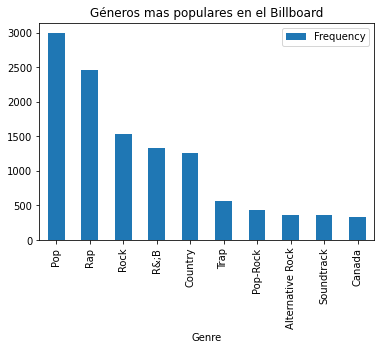

In [14]:
ax = gen2.plot.bar(x='Genre', y = 'Frequency', stacked=True, title = "Géneros mas populares en el Billboard")

En esta tabla se pueden ver los premios grammy del 2018:

In [15]:
print(grammySongs.shape)#dimensión de la tabla de canciones ganadora de los grammy's.
grammySongs.head()

(428, 7)


,Column1,X,GrammyAward,GrammyYear,Genre,Name,Artist
0,1,0,Record Of The Year,2018,General,this is America,Childish Gambino
1,2,1,Song Of The Year,2018,General,this is America,Childish Gambino
2,3,2,Best Pop Solo Performance,2018,Pop,Joanne (where Do you Think You're Goin'?),Lady Gaga
3,4,3,Best Pop Duo/Group Performance,2018,Pop,Shallow,Lady Gaga & Bradley Cooper
4,5,4,Best Dance Recording,2018,Dance/Electronic Music,Electricity,Silk City & Dua Lipa Featuring Diplo & Mark Ro...


En esta tabla se muestran los artistas con mayor número de seguidores en spotify:

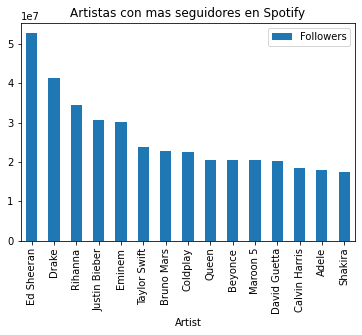

In [16]:
artist_p = artistDf.sort_values(by = ['Followers'], ascending=False)
artist_p = artist_p.head(17)
artist_p = artist_p.drop([769, 828]) #elimina play y cold, ya que eran versiones repetidas de coldplay
ax = artist_p.plot.bar(x= 'Artist', y = 'Followers', stacked= True, title = "Artistas con mas seguidores en Spotify")

La siguiente matriz de correlación muestra como se comparan las variables de los artistas en spotify:

<AxesSubplot:>

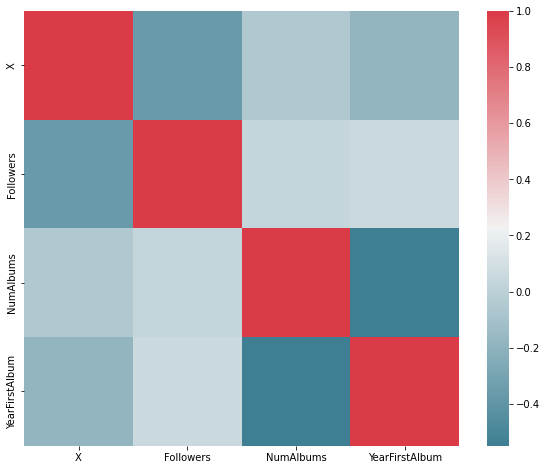

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
corr = artistDf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

En el siguiente gráfico se observa que el artista que tiene más grammy's por canciones es Adele y la banda con más premios es U2:

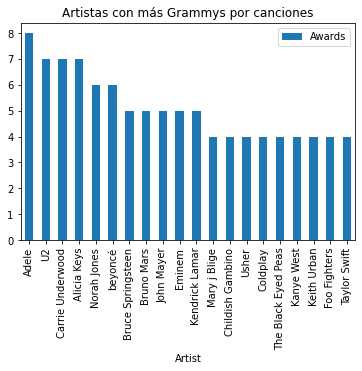

In [18]:
winners = grammySongs.loc[:, ['Artist']]
gen3 = winners.groupby(winners.columns.tolist(),as_index=False).size().rename(columns={'size':'Awards'})
gen4 = gen3.sort_values(by = ['Awards'], ascending=False).head(20)
grs = gen4.plot.bar(x= 'Artist', y = 'Awards', stacked= True, title = 'Artistas con más Grammys por canciones')

El siguiente diagrama de cajas representa la distribución de los atributos,  filtrados por las canciones que aparecen en la tabla de billboard 100:

(3193, 28)


<AxesSubplot:title={'center':'Distribucion de los atributos de las canciones más populares'}>

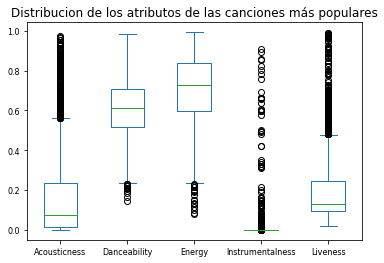

In [19]:

songAttributes1 = songAttributes.rename(columns = {"Artist" : "Artists"})
songAttributes1.head()
sa = (
    songAttributes1.merge(billboardHot100, 
              on=['Name', 'Artists'],
              how='left', 
              indicator=True)
    .query('_merge == "both"')
    .drop(columns='_merge')
)
sa = sa.drop_duplicates(subset = ["Name", "Artists"])
print(sa.shape)
sa.iloc[:,[1, 4, 6, 8, 9]].plot.box(stacked=True, fontsize = 8, title = "Distribucion de los atributos de las canciones más populares")



Tabla de los atributos de canciones que estuvieron alguna vez en el Billboard:

In [20]:
sa.head(2)

,Unnamed: 0_x,Acousticness,Album,Artists,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,...,Unnamed: 0_y,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
59,59,0.000877,Dosage,Collective Soul,0.547,173267,0.902,False,0.000563,0.0839,...,97222.0,96.0,73.0,20.0,1999-07-12,NaN,"Hockey,Gaming,Soundtrack,Rock",Collective soul,Heavy \nComplicate this world you wrapped for ...,NaN
185,33,0.587000,Live At Open Air Gampel (2004),Everlast,0.316,396896,0.634,False,0.000019,0.9070,...,96997.0,47.0,13.0,33.0,1999-07-26,NaN,"Rap,Rock",Everlast,What It's Like \nWe've all seen the man at the...,NaN


A su vez una tabla con los valores independientes

In [21]:
print(songAttributes.shape) #dimensión de la tabla song attributes.
songAttributes.head(2)

(154931, 18)


,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408


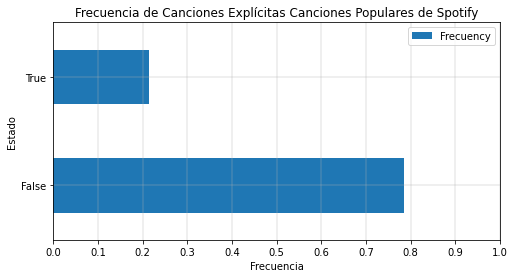

In [22]:
explicit = songAttributes.Explicit.value_counts(normalize=True)
df2 = pd.DataFrame([
                    ["False",explicit[0]],
                    ["True",explicit[1]]
                    ],
                    columns=["State","Frecuency"])

ax  = df2.plot.barh(x = "State", y = "Frecuency", xticks = [k/10 for k in list(range(11))], figsize = (8,4))
ax.set(xlabel = "Frecuencia", ylabel = "Estado", title = "Frecuencia de Canciones Explícitas Canciones Populares de Spotify")
ax.grid(linestyle='-', linewidth=0.4)
plt.show()

# Preguntas y problemas

Preguntas y problemas
 Despues de haber analizando y planteado las tablas con sus respectivos datos sabemos que todas las tablas poseen una medida de popularidad, alcance o ventas, que miden la influencia de la canción artista y/o album, al mismo tiempo se puede ver que estos rankings son distintos ya que spotify tiene una base de datos distinta a las demas tablas (Billboard's, Grammy's) Por lo cual podemos manejarnos entre las tablas midiendo la popularidad con las siguientes preguntas:
 
- ¿Que atributo hace que ciertos géneros musicales se mantengan mas tiempo con popularidad?

Hay Géneros que se mantienen atemporales y siempre figuran en los charts en el transcurso de los 20 años que se registran como es el caso del POP que es el que aparece más veces en la base de datos.

- ¿Qué genero musical llegará al top 1 del Billboard la semana del 13 de Julio del 2019?

El objetivo es estudiar basado en los top anteriores ver si hay algún patrón que permita predecir el género musical de la próxima canción en llegar al primer puesto.

- ¿Qué conjunto de atributos extraídos de las canciones, representa de mejor manera las diferencias entre géneros? 

El objetivo de esta pregunta es ver como las canciones pertenecientes a ciertos géneros se diferencian de otras de otros géneros musicales.

# Metodologías Preguntas

# Pregunta 1

>Planteamos la pregunta de modo que se puedan agrupar distintas características de los géneros mediante varios "joins" de las tablas de los billboardhot100, songatributes y artistDF para tener una mayor variedad posible para analizar der forma más efectiva los dataframes, para así poder encontrar patrones que poseen los géneros con mayor cantidad de apariciones en el chart del billboard y los patrones que poseen los géneros que no perduran en este último, luego se procedera con un data cleaning para solo tener datos comparables y ademas para separar las distintas canciones según su género(que es el enfoque de esta pregunta), mediante distintos tipos de clustering, es decir, se usarán distintos métodos como k-means, los dendogramas,DSBCAN . Si no se obtienen cluster's puros se procederá con subconjuntos de atributos para así encontrar donde más se manifiestan los géneros musicales para así comparar los resultados y ver cual entrega información más valiosa para éste analisis.


Se crea tabla con las canciones con una cantidad mayor o igual de 10 semanas en el Billboard que como equipo se considera como éxito y se dropean los elementos no númericos y se vectorizan los géneros musicales contenidos en cada fila:

In [23]:
JTA_table_check = sa 
JTA_table = JTA_table_check.drop(columns= ["Unnamed: 0_x",'Unnamed: 0_y',"Album", 'Lyrics', 'Writing.Credits', 'Features', 'Date', 'Week','Peak.position'])
vect_genres = JTA_table.Genre.str.split(',', expand = True).stack().str.get_dummies().sum(level=0)
JTA_table['Weeks.on.chart'] = JTA_table['Weeks.on.chart'].fillna(0)

C:\Users\areis\AppData\Local\Temp\ipykernel_9916\1847939867.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  vect_genres = JTA_table.Genre.str.split(',', expand = True).stack().str.get_dummies().sum(level=0)


In [24]:
JTA_table.head()

,Acousticness,Artists,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence,Weekly.rank,Weeks.on.chart,Genre
59,0.000877,Collective Soul,0.547,173267,0.902,False,0.000563,0.0839,-5.560,1,Heavy,50,0.0371,106.923,4,0.548,96.0,20.0,"Hockey,Gaming,Soundtrack,Rock"
185,0.587000,Everlast,0.316,396896,0.634,False,0.000019,0.9070,-11.822,1,What It's Like,21,0.0624,176.628,4,0.500,47.0,33.0,"Rap,Rock"
328,0.028100,Lila McCann,0.644,212360,0.785,False,0.000001,0.0996,-6.118,1,With You,29,0.0294,127.900,4,0.628,92.0,19.0,Pop
356,0.055200,Jordan Knight,0.830,289760,0.655,False,0.000001,0.0567,-7.072,1,Give It To You,43,0.0544,134.869,4,0.653,91.0,20.0,Pop
842,0.046400,Terry Dexter,0.546,242347,0.618,False,0.000000,0.0298,-7.741,0,Better Than Me,9,0.2260,143.269,3,0.641,99.0,0.0,Pop


In [25]:
vect_genres.head()

,Acoustic,Adult Alternative,Adult Contemporary,Afrobeats,Alternative,Alternative Country,Alternative Dance,Alternative Metal,Alternative Pop,Alternative R&;B,...,Trance,Trap,Trip-Hop,Tropical House,UK,UK Rap,Underground Hip-Hop,West Coast,Worship,\xd0\xa0\xd0\xbe\xd1\x81\xd1\x81\xd0\xb8\xd1\x8f (Russia)
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
Numeric_genres = JTA_table.join(vect_genres)
ArtistDf=artistDf.rename(columns = {"Artist" : "Artists"})
Numeric_genres = (
    Numeric_genres.merge(ArtistDf, 
            on=['Artists'],
            how='left', 
            indicator=True)
    .query('_merge == "both"')
    .drop(columns='_merge')
)
Numeric_genres_check = Numeric_genres
#lineas de codigo para modificar parametros
#Numeric_genres = Numeric_genres[Numeric_genres['Explicit'] ==0]
Numeric_genres = Numeric_genres.drop(columns = ['Genre', 'Name', 'Artists','X','Genres','YearFirstAlbum','Gender','Group.Solo'])
Numeric_genres['Explicit'] = Numeric_genres['Explicit'].astype(int)
Numeric_genres

,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,...,Trip-Hop,Tropical House,UK,UK Rap,Underground Hip-Hop,West Coast,Worship,\xd0\xa0\xd0\xbe\xd1\x81\xd1\x81\xd0\xb8\xd1\x8f (Russia),Followers,NumAlbums
0,0.000877,0.547,173267,0.902,0,0.000563,0.0839,-5.560,1,50,...,0,0,0,0,0,0,0,0,525701.0,12.0
1,0.587000,0.316,396896,0.634,0,0.000019,0.9070,-11.822,1,21,...,0,0,0,0,0,0,0,0,200550.0,11.0
2,0.028100,0.644,212360,0.785,0,0.000001,0.0996,-6.118,1,29,...,0,0,0,0,0,0,0,0,42444.0,4.0
3,0.055200,0.830,289760,0.655,0,0.000001,0.0567,-7.072,1,43,...,0,0,0,0,0,0,0,0,47229.0,4.0
4,0.046400,0.546,242347,0.618,0,0.000000,0.0298,-7.741,0,9,...,0,0,0,0,0,0,0,0,790.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,0.251000,0.838,237333,0.492,0,0.000000,0.2620,-5.690,0,73,...,0,0,1,0,0,0,0,0,52698756.0,8.0
3193,0.914000,0.589,221107,0.242,0,0.000000,0.0887,-10.517,1,80,...,0,0,1,0,0,0,0,0,52698756.0,8.0
3194,0.448000,0.747,191147,0.760,0,0.000000,0.1530,-4.294,1,72,...,0,0,1,0,0,0,0,0,52698756.0,8.0
3195,0.669000,0.642,258373,0.289,0,0.000000,0.1800,-9.918,1,27,...,0,0,1,0,0,0,0,0,52698756.0,8.0


In [27]:

pca1 = PCA(n_components=2).fit(Numeric_genres)
rates_pca1 = pca1.transform(Numeric_genres)
rates_pca1.shape

fig, ax = plt.subplots(sharex=True, figsize = (10,5))
plt.scatter(rates_pca1[:,0], rates_pca1[:,1])
plt.title('Distribución PCA')
plt.show()

NameError: name 'PCA' is not defined

In [ ]:
SSE = []
numClusters = list(range(1, 20))
for k in numClusters:
    k_means = KMeans(n_clusters=k, n_init=20, max_iter= 300, random_state=1)
    k_means.fit(Numeric_genres)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE, marker="o")
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
kmeans =  KMeans(n_clusters=5, n_init = 20, max_iter= 300 , random_state=42)
kmeans.fit(Numeric_genres)
y_pred = kmeans.labels_
np.bincount(y_pred)

In [ ]:
fig, ax = plt.subplots(sharex=True, figsize = (12, 4))
plt.scatter(rates_pca1[:, 0], rates_pca1[:, 1], c= kmeans.labels_)
plt.title("k-means cluster's k = 5")

# Pregunta 2

>El objetivo de la pregunta es entrenar un clasificador que permita encontrar patrones y predecir el comportamiento del billboard para así encontrar la canción top 1 de una semana, y de ésta manera predecir la semana siguiente a la última del dataset. Se puede probar con distintos algoritmos de clasificación y usar gridSearchCV para encontrar el mejor algoritmo y los mejores parámetros que permitan predecirla. También se puede utilizar cross validation para entrenar el clasificador con distintos subconjuntos y así iterar para obtener mejores resultados. Para no utilizar tantos géneros distintos y extraños, se considerarán los 20 géneros más populares en el Billboard y se seleccionará uno de éstos para cada canción. La tabla donde se realizará la predicción será una tabla que contendrá, por cada semana, los datos de todas las 100 canciones del billboard hot 100 de la semana anterior, y la clase de género de la canción top 1 de la semana.

Inicialmente se crea una tabla que contiene los géneros de todas las canciones del billboard acotados a una lista más corta, pero que los representa a todos. Ésto se hace porque hay en total más de 300 géneros y cada canción tiene de 1 a 10.

In [28]:
study_table = billboardHot100
genres = pd.DataFrame(study_table["Genre"])
genres2 = genres.dropna(axis = 1)
genres2.columns = ['gen']
normal_genres = [ 'Rock', 'Country', 'Alternative', 'Country', 'Rap', 'Pop', 'R&;B']
for i, row in genres.iterrows():
    for j in row:
        for word in normal_genres:
            word2 = word
            word2.lower()
            if j.find(word)!=-1 or j.find(word2)!=-1:
                genres2.at[i, 'gen'] = word
                break
        break
genres2


,gen
0,Country
1,Pop
2,Alternative
3,Pop
4,Pop
...,...
97220,Pop
97221,Rock
97222,Country
97223,Rap


In [29]:
genres3 = genres2.groupby(genres2.columns.tolist(),as_index=False).size().rename(columns={'size':'count'})
genres3 = genres3.sort_values(by = "count", ascending = False)
genres3.head(50) #para analizar los datos de genres2

,gen,count
4,Rap,28866
5,Rock,26751
2,Pop,23492
1,Country,12106
3,R&;B,4069
0,Alternative,1941


Aquí se genera una tabla con cada semana, y los datos que aparecen en el billboard de todas las canciones de la semana anterior. Cada fila de la tabla representa una semana con las canciones correspondientes.
Tiene también una columna que representa el género del top 1 de la semana actual, lo que servirá de clase para realizar la predicción.

In [30]:
#7-06-2019 top100genero, top100nombre, top100artista..., top99genero...  top1genero (no anhadir nada mas del top1)
billboardColumns = ['Artists', 'Name', 'Weeks.on.chart', 'Date' ,'Genre']
columnas = ['semana', 'top1prediccion']
for i in range(1, 101):
    for name in billboardColumns:
        string ='top' + str(i) + name
        columnas.append(string)
weeks = pd.DataFrame(billboardHot100['Week'])
weeks = weeks.drop_duplicates( subset = ["Week"], ignore_index = True)
weeks = weeks['Week']

tablaPrediccion = pd.DataFrame(columns = columnas)
print(weeks.shape)
print(tablaPrediccion.shape)
for i in range(len(weeks)-1):
    currentWeek = weeks[i]
    data = [currentWeek]
    oldWeek = weeks[i+1]
    for  row in billboardHot100.itertuples():
        j = row.Index
        if(row.Week == currentWeek and row._4==1):
            data.append(genres2.at[j, 'gen'])
        if(row.Week == oldWeek):
            for word in billboardColumns:
                if word!='Genre':
                    data.append(billboardHot100.at[j, word])
                else:
                    data.append(genres2.at[j, 'gen'])
    while(len(data) < 502):
        data.append("None")
    tablaPrediccion.loc[len(tablaPrediccion)] = data

(1043,)
(0, 502)


In [31]:
#limpieza de datos de la tabla generada, ya que en la tabla original faltan algunos top 1
genresmaximos = genres3['gen'].to_numpy()
tablaPrediccion2 = tablaPrediccion[tablaPrediccion.top1prediccion.isin(genresmaximos)]

Luego se vectorizan los datos de la tabla para poder aplicarle un clasificador que prediga la clase (género) del top 1 utilizando los datos de la semana anterior.

In [56]:
tablaPrediccion2

,semana,top1prediccion,top1Artists,top1Name,top1Weeks.on.chart,top1Date,top1Genre,top2Artists,top2Name,top2Weeks.on.chart,...,top99Artists,top99Name,top99Weeks.on.chart,top99Date,top99Genre,top100Artists,top100Name,top100Weeks.on.chart,top100Date,top100Genre
0,2019-07-06,Country,"Lil Nas,",Old Town Road,6.0,"April 5, 2019",Country,Taylor Swift,You Need To Calm Down,NaN,...,Justin Moore,The Ones That Didn't Make It Back Home,NaN,"October 12, 2018",Country,None,None,None,None,None
1,2019-06-29,Country,"Lil Nas,",Old Town Road,5.0,"April 5, 2019",Country,Billie Eilish,Bad Guy,11.0,...,Sech,Otro Trago,NaN,"April 19, 2019",Pop,None,None,None,None,None
2,2019-06-22,Country,"Lil Nas,",Old Town Road,4.0,"April 5, 2019",Country,Billie Eilish,Bad Guy,10.0,...,None,None,None,None,None,None,None,None,None,None
3,2019-06-15,Country,"Lil Nas,",Old Town Road,3.0,"April 5, 2019",Country,Billie Eilish,Bad Guy,9.0,...,Jhene Aiko,Triggered,3.0,"May 8, 2019",R&;B,None,None,None,None,None
4,2019-06-08,Country,"Lil Nas,",Old Town Road,2.0,"April 5, 2019",Country,"Ed Sheeran, Justin Bieber",I Don't Care,2.0,...,"Nicky Jam, Ozuna",Te Robare,2.0,"March 22, 2019",Pop,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,1999-08-23,Pop,Christina Aguilera,Genie In A Bottle,8.0,NaN,Pop,Destiny's Child,"Bills, Bills, Bills",10.0,...,None,None,None,None,None,None,None,None,None,None
1037,1999-08-16,Pop,Christina Aguilera,Genie In A Bottle,7.0,NaN,Pop,K,Tell Me It's Real,12.0,...,None,None,None,None,None,None,None,None,None,None
1038,1999-08-09,Pop,Christina Aguilera,Genie In A Bottle,6.0,NaN,Pop,Destiny's Child,"Bills, Bills, Bills",8.0,...,None,None,None,None,None,None,None,None,None,None
1039,1999-08-02,Pop,Christina Aguilera,Genie In A Bottle,5.0,NaN,Pop,Destiny's Child,"Bills, Bills, Bills",7.0,...,None,None,None,None,None,None,None,None,None,None


In [55]:
import requests
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

stopwords_list = 'english'

def remove_vowels_accents(text):
    return (
        text.replace("á", "a")
        .replace("é", "e")
        .replace("í", "i")
        .replace("ó", "o")
        .replace("ú", "u")
        .replace("ü", "u")
    )

def remove_stopwords(text, stopwords_list):
    return " ".join(
        [word for word in str(text).split() if word not in stopwords_list]
    )

def reduce_spam(text):
    text = re.sub(r"(\w+)(\s+\1){2,}", r"\1", text)
    text = re.sub(r"(\w+\s+\w+)(\s+\1){2,}", r"\1", text)
    return text

def remove_unprintable_(text):
    printable = set(string.printable + "ñáéíóúü" + "ÑÁÉÍÓÚÜ")
    text = "".join(filter(lambda x: x in printable, text))
    return text

def remove_punctuation(text):
    pattern = re.compile(r"[^\w\sáéíóúüñÁÉÍÓÚÜÑ]")
    t = pattern.sub(r" ", text)
    return re.sub(" +", " ", t)

def preprocesar(text):
    text = text.lower()
    text = remove_unprintable_(text)
    text = remove_punctuation(text)
    text = reduce_spam(text)
    text = remove_stopwords(text, stopwords_list)
    text = remove_vowels_accents(text)
    return text.strip()

vectorizer = CountVectorizer(preprocessor=preprocesar, min_df=2)
tablaPrediccion3 = tablaPrediccion2.drop(columns = ["top1prediccion", "semana"])
vector = pd.DataFrame()
for word in tablaPrediccion3.columns:
    if ("Weeks.on.chart" in word or "Date" in word):
        x=1
    else:
        if('Artists' in word or 'Genre' in word):
            enc = OneHotEncoder()
            vector2 = enc.fit_transform(tablaPrediccion3[word].to_numpy().reshape(-1, 1))
            #vector2 = enc.transform(tablaPrediccion3[word])
            vector2 = pd.DataFrame(vector2, columns=enc.get_feature_names_out())
            vector = pd.concat([vector, vector2], axis = 1)
            
        else:
            vector2 = vectorizer.fit_transform(tablaPrediccion3[word]).toarray()
            vector2 = pd.DataFrame(vector2, columns=vectorizer.get_feature_names_out())
            vector = pd.concat([vector, vector2], axis = 1)
vector

ValueError: Shape of passed values is (982, 1), indices imply (982, 130)

In [48]:
X = vector
y = tablaPrediccion2["top1prediccion"]
y2 = pd.DataFrame(y)

df_vectorizado = pd.concat([y, X], axis=1)
df_vectorizado.dropna(subset = "top1prediccion")[50:150]

,top1prediccion,0,1,2,3,4,5,6,7,8,...,6,7,love,none,wins,0,1,2,3,4
50,Rap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
51,Rap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
52,Rap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
53,Alternative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
54,Rap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
146,Pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
147,Pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
148,Pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
test = y2.groupby(y2.columns.tolist(),as_index=False).size().rename(columns={'size':'count'})
test = test.sort_values(by = "count", ascending = False)
test.head() #para analizar los datos de la tabla

,top1prediccion,count
4,Rap,386
2,Pop,371
5,Rock,123
0,Alternative,66
3,R&;B,20


Finalmente se le aplica el clasificador

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

clf = DecisionTreeClassifier(random_state = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2, stratify=y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

Los resultados son aceptables, pero podrían ser mejores. Para el próximo hito se cambiará la forma en la que se realiza la vectorización, de manera que se utilizará OneHotEncoder para los nombres de artistas y los géneros, y se separarán los datos del top.

# Pregunta 3

>Como la tabla de 'songAttributes' no tiene el atributo de género musical de la canción, se utiliza la tabla de 'artistDf' que contienen informarción de los artistas incluyendo su género musical. la idea es generar cluster's que en teoría deberían agruparse según géneros musicales por lo primero se evaluará la pureza de estos, por lo que se usáran distintas formas de hacer cluster's, es decir, se usarán métodos como k-means, los dendogramas, etc. Si no se obtienen cluster's puros se procederá con subconjuntos de atributos para así encontrar donde más se diferencian los géneros musicales. Para facilitar el estudio de esto se tomarán los géneros musicales que aparecen primero en la tabla de 'artistDf' y posteriormente mediante clustering dar etiquetas más claras a cada canción.

## Data cleaning

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Se visualizan el contenido de las Dataframe que son relevantes para desarrollar esta pregunta.

In [ ]:
songAttributes.head(2)

In [ ]:
artistDf.head(2)

Se procede a crear el dataframe donde se trabajará agregando de 'aristDf' el género(s) músical de cada canción y dejando el parámetro 'Explicit' expresado de forma binaria, tambiém se tomo una muestra aleatoria del dataset a utilizar de dimensión de 2000 filas:

In [ ]:
data_cleaned = songAttributes.merge(artistDf.loc[:,['Artist', 'Genres']],
                                on = ['Artist'],
                                how = 'inner',
                                indicator = False)

data_cleaned = data_cleaned.drop(labels = ['Unnamed: 0'], axis = 1)
data_cleaned['Explicit'] = data_cleaned['Explicit'].astype(int)


idx = data_cleaned.columns.get_loc("Name")
columns = data_cleaned.columns.to_list()[idx:idx+1] + data_cleaned.columns.to_list()[1: idx] + data_cleaned.columns.to_list()[0:1] + data_cleaned.columns.to_list()[idx+1:] #webeo para cambiar el orden de columnas
data_cleaned = data_cleaned[columns]

data_cleaned_sample = data_cleaned.sample(n = 4000, replace = False, random_state= 27)

In [ ]:
data_cleaned_sample.head(2)

 Se eliminan atributos de texto que no pueden ser utilizados en KMeans como el nombre del artista, el nombre del albúm y el nombre de la canción por ser datos en forma de texto (lo mismo se hizo para cada metodología de clustering):

In [ ]:
# se eliminan atributos de texto que no pueden ser utilizados en KMeans
data_k_means = data_cleaned_sample.drop(columns = ['Album','Artist', 'Name'])
data_k_means = data_k_means.drop(columns = ['Duration','Popularity','Tempo','TimeSignature','Genres'])

De esta forma se toma el conjunto `[Danceability, Energy, Explicit, Instrumentalness, Liveness, Loudness, Mode, Acousticness, Speechiness, Valence]` para hacer el clustering en K-means y el resto de los métodos, ya que se considera que cosas como Popularidad no son relevantes, ya que no aportan elementos musicales de las composiciones, se descartó Duración y Tempo ya que al no estar normalizados ocasionaría problemas para el desarrollo del clustering, también se saco 'Time Signature', ya que no se comprende bien lo que evalua o lo que se mide, ya que en el dataset original de kaggle no se encontró una explicación satisfactoria de este:

Quedando así la tabla para agrupar las canciones:

In [ ]:
data_k_means.head()

Se prodeció a reducir la dimensionalidad mediante PCA para poder gráficar los datos en un gráfico:

In [ ]:
pca = PCA(n_components=2).fit(data_k_means)
rates_pca = pca.transform(data_k_means)
rates_pca.shape

In [ ]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
plt.scatter(rates_pca[:,0], rates_pca[:,1])
plt.title('Distribución PCA')
plt.show()

Método de la rodilla para obtener el número óptimo de cluster's, donde se opta por usar `k = 4` para k-means:

In [ ]:
SSE = []
numClusters = list(range(1, 20))
for k in numClusters:
    k_means = KMeans(n_clusters=k, n_init=20, max_iter= 300, random_state=1)
    k_means.fit(data_k_means)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE, marker="o")
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
kmeans =  KMeans(n_clusters=4, n_init = 20, random_state=1)
kmeans.fit(data_k_means)
y_pred = kmeans.labels_
np.bincount(y_pred)

## K-means:

Se procede a ejecutar k-means para poder agrupar en cluster's los datos:

In [ ]:
kmeans =  KMeans(n_clusters=4, n_init = 20, max_iter= 300 , random_state=1)
kmeans.fit(data_k_means)
y_pred = kmeans.labels_
np.bincount(y_pred)

In [ ]:
fig, ax = plt.subplots(sharex=True, figsize = (12, 4))
plt.scatter(rates_pca[:, 0], rates_pca[:, 1], c= kmeans.labels_)
plt.title("k-means cluster's k = 4")

## Clustering Jerárquico

En esta sección se aplicaron los distintos métodos de clustering jerárquico menos Single que al no lograr un dendograma muy útil se decidió por descartarlo por temas de espacio del informe. A continuación se limpian los datos de la misma forma que en k-means:

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
names = data_cleaned_sample['Name']
Y = data_cleaned_sample['Genres']
X = data_cleaned_sample.drop(columns = ['Album','Artist', 'Name', 'Genres', 'Duration','Popularity','Tempo','TimeSignature'])

In [ ]:
X.head(2)

### WARD

Procediendo con el método ward se opto por cortar en `x = 40`, ya que con eso se logra unos cluster's de tamaño más o menos uniforme:

In [ ]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
Z = linkage(X, method='ward', metric='euclidean') # distancia maxima entre putnos
plt.axvline(x= 40, color='r', linestyle='--')
dn = dendrogram(Z, labels = ['' for k in range(0,len(X))], orientation='right')
plt.title('Dendograma linkage : Ward')
plt.plot()

In [ ]:
distance = 40

ward_euclidean = AgglomerativeClustering(linkage='ward',
                                affinity='euclidean',
                                n_clusters=None,
                                distance_threshold=distance).fit(X)

Quedando de la siguiente forma distribuidos los cluster's donde dio que habían 5 de estos: 

In [ ]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
plt.scatter(rates_pca[:,0],rates_pca[:,1], c= ward_euclidean.labels_)
plt.title('Agglomeraty clustering linkage: Ward').set_fontsize(14)
plt.show()
np.unique(ward_euclidean.labels_)

### COMPLETE

Con complete se decidió por cortar en `x = 0.1`: 

In [ ]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
Z = linkage(X, method='complete', metric='cosine') # distancia maxima entre putnos
dn = dendrogram(Z, labels = None,orientation='right')
plt.axvline(x= 0.1, color='r', linestyle='--')
dn = dendrogram(Z, labels = ['' for k in range(0,len(X))], orientation='right')
plt.title('Dendograma linkage : Complete')

In [ ]:
distance = 0.1

complete_cosine = AgglomerativeClustering(linkage='complete',
                                affinity='cosine',
                                n_clusters=None,
                                distance_threshold= distance).fit(X)

Quedando de la siguiente forma la distribución de los cluster's, donde dio que habían 11 de estos:

In [ ]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
plt.scatter(rates_pca[:,0],rates_pca[:,1], c= complete_cosine.labels_)
plt.title('Agglomeraty clustering linkage: Complete').set_fontsize(14)
plt.show()
np.unique(complete_cosine.labels_)

### Average

A diferencia de los otros métodos en este se opto por tomar `k = 4` directamente: 

In [ ]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
Z = linkage(X, method='average', metric='cosine')
plt.axvline(x= 0.05, color='r', linestyle='--')
dn = dendrogram(Z, labels= None,orientation='right')

In [ ]:
distance = 0.12
n_clusters = None

average_cosine = AgglomerativeClustering(linkage='average',
                                affinity='cosine',
                                n_clusters=n_clusters,
                                distance_threshold= distance).fit(X)

Quedando la siguiente distribución de cluster's con 6 de estos:

In [ ]:
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
plt.scatter(rates_pca[:,0],rates_pca[:,1], c= average_cosine.labels_)
plt.title('Agglomeraty clustering linkage: Average').set_fontsize(14)
plt.show()
np.unique(average_cosine.labels_)

## DBSCAN

Para DBSCAN se procedió con el método de la rodilla para decidir el valor de `eps` donde se llegó que `eps = 0.72` y `min_samples = 14` :

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [ ]:
N = 14
nbrs = NearestNeighbors(n_neighbors=N).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y= 0.81, color='r', linestyle='--')
plt.plot(distances)
plt.show()

Posteriormente se vió que se formaron 6 cluster's:

In [ ]:
dbscan = DBSCAN(eps= 0.82, min_samples= 14).fit(X)
fig, ax = plt.subplots(sharex=True, figsize = (10,5))
plt.scatter(rates_pca[:,0], rates_pca[:,1], c = dbscan.labels_)
plt.title('DSBCAN')
plt.show()
print(np.unique(dbscan.labels_))

Se puede ver a continuación la distribución de los cluster's mediante DBSCAN. Se va considerar la clase `-1` corresponde a ruido debido a que no se adaptan a ningún cluster.

In [ ]:
np.unique(dbscan.labels_, return_counts = True)

## Metricas de Evaluación

Se evaluan los puntajes de silhoutte de los modelos realizados anteriormente, donde en DBSCAN para obtener un valor más adecuado se decidio filtrar el ruido obtenido al realizar el procedimiento:

In [ ]:
from sklearn.metrics import silhouette_score

print("Dataset X K-Means\t", silhouette_score(data_k_means, kmeans.labels_))
print("Dataset X Ward \t", silhouette_score(X, ward_euclidean.labels_))
print("Dataset X Complete\t", silhouette_score(X, complete_cosine.labels_))
print("Dataset X Average \t", silhouette_score(X, average_cosine.labels_))
print("Dataset X DBSCAN\t", silhouette_score(X, dbscan.labels_ >= 0))




## Evaluación de Resultados

Viendo que DBSCAN obtuvo el valor más cercano a 1 de los métodos utilizados se procederá a estudiar este para obtener la respuesta de la pregunta 3, por lo que se concatenan el ID de cada cluster a la tabla con los `dbscan.labels_`: 

In [ ]:
DBSCAN_results = data_cleaned_sample.copy()
DBSCAN_results['Cluster ID'] = dbscan.labels_
DBSCAN_results.head(2)

Se crea un Dataframe para cada las instancias de cada clase.

In [ ]:
cluster_0 = DBSCAN_results[DBSCAN_results['Cluster ID'] == 0] 
cluster_1 = DBSCAN_results[DBSCAN_results['Cluster ID'] == 1]
cluster_2 = DBSCAN_results[DBSCAN_results['Cluster ID'] == 2]
cluster_3 = DBSCAN_results[DBSCAN_results['Cluster ID'] == 3]
cluster_4 = DBSCAN_results[DBSCAN_results['Cluster ID'] == 4]
cluster_5 = DBSCAN_results[DBSCAN_results['Cluster ID'] == 5]
cluster_6 = DBSCAN_results[DBSCAN_results['Cluster ID'] == 6]
cluster_7 = DBSCAN_results[DBSCAN_results['Cluster ID'] == 7]

En este caso dado que el mejor coeficiente de Silloute se obtiene con el modelo de DBSCAN se evaluaran por **inspección** los clusters. La forma de evaluar las diferencias entre los atributos entre los cluster's va a ser tomando muestras aleatorias y coomparar los valores que componen a cada muestra y así evaluar el conjunto donde se destaca más las diferencias númericas.

In [ ]:
cluster_0.sample()

In [ ]:
cluster_2.sample()

Se puede observar que la mayoria de canciones que poseen rap o "hip-hop" como género convergen en ser explicitas, con una bailabilidad y energía alta y ser muy "acusticas, a su vez se puede ver que para figurar en esta lista, las canciones deben tener muy bajo el valor de "Liveness", por otra parte las canciones pop y metal difieren ejn casi todos sus parametros exceptuando los valores "Instrumentalness" y "Mode" valores que posiblemente seran removidos para una mayor segregación de los grupos de géneros, a su vez se tiene que ciertos géneros seran agrupados de forma inevitable en un mismo género como puede ser el rap y el hip-hop o el rock y el metal por lo cual se necesitara de un analisís más grupal de los géneros que coincidan en nuestros clusters

Para evaluar si los cluster logran asociar una tendencia en los atributos a un género o conjunto de géneros, se contabilizaran los generos asociados a cada instancia para todas las instancia de un mismo cluster. 

In [ ]:
def contarGen(df):
    dicc = {}
    i = 0
    for row, col in df.iterrows():
        if type(col['Genres']) == float:
            continue
        aux = col['Genres'].split(',')
        for k in aux:
            if k in aux:
                dicc[k] = dicc.get(k,0) + 1
            i+=1
    gen = pd.DataFrame([[key, dicc[key]] for key in dicc.keys()], columns=['Genre', 'Frequency'])
    gen1_5 = gen.sort_values(by = ['Frequency'], ascending=False)
    return gen1_5

In [ ]:
contarGen(cluster_1).head(8)

In [ ]:
contarGen(cluster_2).head(8)

In [ ]:
contarGen(cluster_5).head(8)

Se puede apreciar que orientar nuestro análisis a los generos musicales puede beneficiarnos de muchas maneras debido a que no poseen diferencias muy marcadas a dia de hoy y las canciones en particular poseen muchos géneros lo cual al ser investigado podria entregarnos si la música se volvio repetitiva, lo cual indicaria clusters muy coincidientes entre sí, o que la música esta en auge debido a las nuevas tecnologias y es posible determinar la integridad de los géneros mediante el análisis, por lo cual unos resultados poco claros es justo lo que podriamos estar enfrentando.

Se puede apreciar para los primeros cluster's que no existe una relevancia de un género sobre los otros, incluso existen generos comunes a todos los cluster's como el pop. Esto nos indica que para la selección de datos y elección de parámetros del modelo no fue posible asociar los atributos de las canciones con un conjunto de géneros que sigan una misma tendencia músical. Lo anterior como equipo se asocia a que dentro de un mismo genero, existen variaciones que exploran otras corrientes musicales, provocando la difuminación de atributos marcados de las asociadas al género puro. Es por tanto que se concluye que no existen una relación clara entre atributos y generos.

Se espera para el Hito 3 explorar variantes de los modelos empleados y de los atributos de la data utilizados para confirmar los resultados actuales o encontrar una combinación que proporciones una clasificación de cluster's relevantes.

## Participación

Para el hito 2 Hernán trabajo en el preprocesamiento de las tablas para la primera pregunta, además de redactar esta pregunta, a su vez trabajo en arreglar algunas combinaciones de tablas para su futura utilización en las preguntas. Alexander se encargó de redactar y preparar la pregunta 2, preprocesando la tabla y aplicando modelos de clasificación los cuales no resultaron en primer momento por lo cual se encargó de reformular el Dataframe para ajustarlo al modelo a utilizar. Gonzalo se encargó de formular la tercera preguntas y su posible resolución proponiendo métodos como clustering y clasificación, ajustar los parámetros de los modelo y evaluar los resultados. Finalmente Ignacio se encargó de realizar los gráficos, configurar los modelos, dendogramas, preprocesar las tablas a utilizar y evaluar los resultados obtenidos de la pregunta 3.